### 사전준비

In [1]:
# 기본적인 패키지부터 추가
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 한글/차트 마이너스 없애기
from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')

### 패션 MNIST 데이터

#### 데이터 로드

In [3]:
from tensorflow import keras
from tensorflow.keras.datasets.fashion_mnist import load_data
from sklearn.model_selection import train_test_split

In [4]:
(train_input, train_target), (test_input, test_target) = load_data()

#### 정규화

In [5]:
print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [6]:
train_scaled = train_input / 255.0  # 0~1 사이 실수값으로 변경

In [7]:
# 이름 test로 쓰면 중복돼서 val 쓰는거래
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [8]:
train_input.shape

(60000, 28, 28)

In [9]:
print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)

(48000, 28, 28) (48000,)
(12000, 28, 28) (12000,)


#### 모델생성 함수

In [10]:
def model_fn(a_layer=None):  # 값 없으면 없는대로
    model = keras.Sequential(name='model_fn_MakeModel')
    model.add(keras.layers.Flatten(input_shape=(28,28)))  # 2차원 입력값을 1차원으로 바꿔줌
    model.add(keras.layers.Dense(100, activation='relu', name='hidden'))

    if a_layer: # a_layer가 None이 아니면
        model.add(a_layer)

    model.add(keras.layers.Dense(10, activation='softmax', name='output'))

    return model

In [11]:
# 함수 사용 예
model = model_fn(keras.layers.Dense(100, activation='relu', name='hidden2'))
model.summary()

Model: "model_fn_MakeModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 hidden2 (Dense)             (None, 100)               10100     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


#### 손실곡선, 정확도

In [12]:
model = model_fn()
model.summary()

Model: "model_fn_MakeModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5, verbose=2)  # verbose=0은 출력과정 안나옴, 1은 디폴트, 2는 진행바 없이 출력

Epoch 1/5
1500/1500 - 2s - loss: 0.5379 - accuracy: 0.8111 - 2s/epoch - 2ms/step
Epoch 2/5
1500/1500 - 2s - loss: 0.3983 - accuracy: 0.8582 - 2s/epoch - 1ms/step
Epoch 3/5
1500/1500 - 2s - loss: 0.3584 - accuracy: 0.8714 - 2s/epoch - 1ms/step
Epoch 4/5
1500/1500 - 2s - loss: 0.3350 - accuracy: 0.8776 - 2s/epoch - 1ms/step
Epoch 5/5
1500/1500 - 2s - loss: 0.3203 - accuracy: 0.8862 - 2s/epoch - 1ms/step


In [14]:
history.history

{'loss': [0.5378934144973755,
  0.3983173072338104,
  0.35839739441871643,
  0.3349946141242981,
  0.32034632563591003],
 'accuracy': [0.8111458420753479,
  0.8582083582878113,
  0.8713750243186951,
  0.8776041865348816,
  0.8862291574478149]}

#### 손실곡선 차트

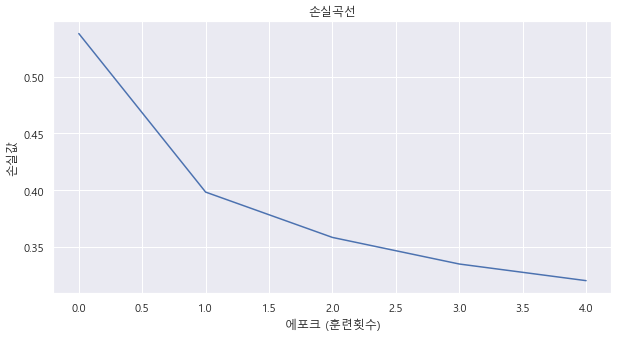

In [15]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.title('손실곡선')
plt.xlabel('에포크 (훈련횟수)')
plt.ylabel('손실값')
plt.show()

#### 정확도 차트

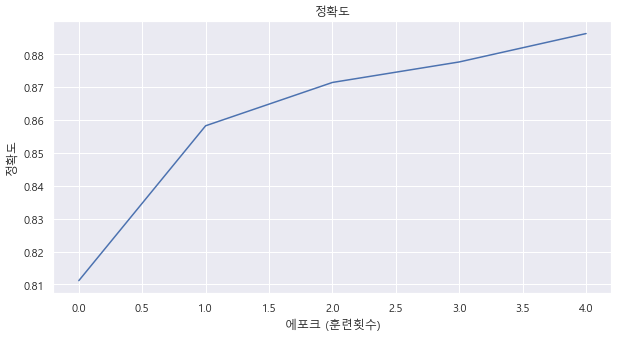

In [16]:
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'])
plt.title('정확도')
plt.xlabel('에포크 (훈련횟수)')
plt.ylabel('정확도')
plt.show()

#### 에포크 20번 훈련

In [17]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5268 - accuracy: 0.8155
Epoch 2/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3897 - accuracy: 0.8588
Epoch 3/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3539 - accuracy: 0.8717
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3336 - accuracy: 0.8815
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3174 - accuracy: 0.8878
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3070 - accuracy: 0.8906
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2989 - accuracy: 0.8951
Epoch 8/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2900 - accuracy: 0.8980
Epoch 9/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2800 - accuracy: 0.9017
Epoch 10/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.276

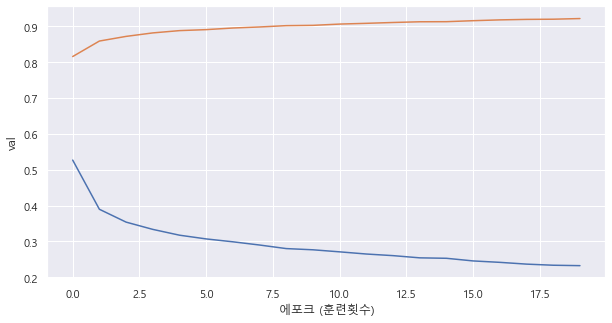

In [18]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
# plt.title('정확도')
plt.xlabel('에포크 (훈련횟수)')
plt.ylabel('val')
plt.show()

#### 검증손실

훈련세트 훈련 -> 정확도 92%

In [19]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target))  # 검증데이터 같이 넣어서 돌려봄
# 결과를 보니 과대적합

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5367 - accuracy: 0.8117 - val_loss: 0.4778 - val_accuracy: 0.8331
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3931 - accuracy: 0.8576 - val_loss: 0.3683 - val_accuracy: 0.8712
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3553 - accuracy: 0.8725 - val_loss: 0.3656 - val_accuracy: 0.8694
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3337 - accuracy: 0.8807 - val_loss: 0.3605 - val_accuracy: 0.8760
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3170 - accuracy: 0.8859 - val_loss: 0.3779 - val_accuracy: 0.8738
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3081 - accuracy: 0.8911 - val_loss: 0.3559 - val_accuracy: 0.8775
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2958 - accuracy: 0.8952 - val_loss: 0.3787 - val_accuracy:

In [20]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

#### 훈련세트/검증세트 비교

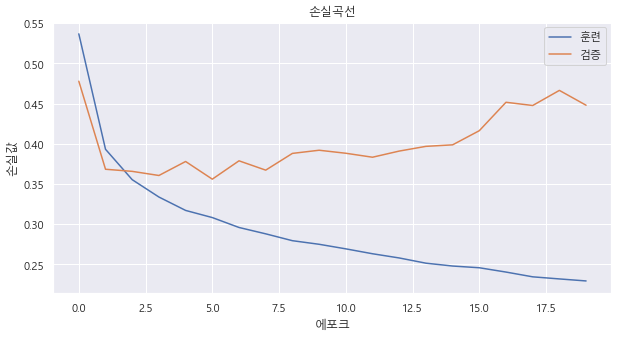

In [21]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('손실곡선')
plt.xlabel('에포크')
plt.ylabel('손실값')
plt.legend(['훈련', '검증'])
plt.show()

#### 드롭아웃

In [22]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()
# 랜덤한 30%만 빼고 훈련

Model: "model_fn_MakeModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5853 - accuracy: 0.7929 - val_loss: 0.4412 - val_accuracy: 0.8422
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4486 - accuracy: 0.8418 - val_loss: 0.4216 - val_accuracy: 0.8577
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4221 - accuracy: 0.8532 - val_loss: 0.4065 - val_accuracy: 0.8612
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4051 - accuracy: 0.8590 - val_loss: 0.3832 - val_accuracy: 0.8671
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4011 - accuracy: 0.8624 - val_loss: 0.3921 - val_accuracy: 0.8706
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3950 - accuracy: 0.8657 - val_loss: 0.3807 - val_accuracy: 0.8737
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3857 - accuracy: 0.8705 - val_loss: 0.3865 - val_accuracy:

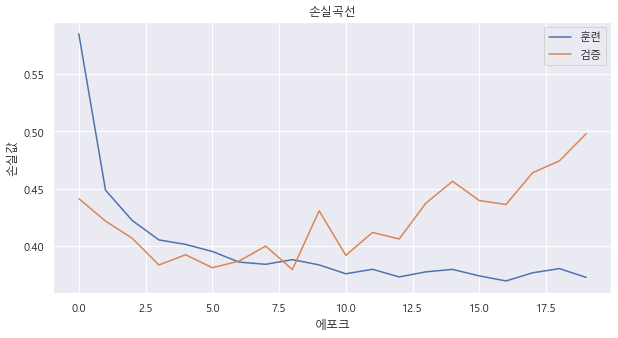

In [24]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('손실곡선')
plt.xlabel('에포크')
plt.ylabel('손실값')
plt.legend(['훈련', '검증'])
plt.show()
# 결과: 떨어지긴 했는데 안좋다

In [25]:
# 옵티마이저 적용
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3705 - accuracy: 0.8731 - val_loss: 0.4012 - val_accuracy: 0.8755
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3429 - accuracy: 0.8768 - val_loss: 0.3934 - val_accuracy: 0.8740
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3340 - accuracy: 0.8786 - val_loss: 0.3827 - val_accuracy: 0.8744
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3272 - accuracy: 0.8806 - val_loss: 0.3807 - val_accuracy: 0.8767
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3185 - accuracy: 0.8826 - val_loss: 0.3649 - val_accuracy: 0.8811
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3133 - accuracy: 0.8845 - val_loss: 0.3920 - val_accuracy: 0.8792
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3127 - accuracy: 0.8841 - val_loss: 0.3677 - val_accuracy:

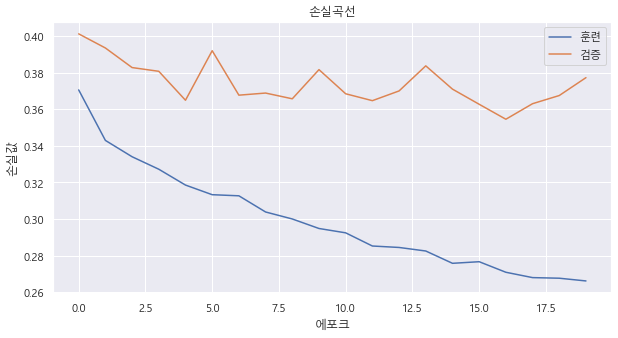

In [26]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('손실곡선')
plt.xlabel('에포크')
plt.ylabel('손실값')
plt.legend(['훈련', '검증'])
plt.show()
# 결과: 떨어지긴 했는데 안좋다
# 그래프 이상하게 나와서 밑에서 모델 다시 생성, 훈련

In [27]:
def model_fn(a_layer=None):  # 값 없으면 없는대로
    model = keras.Sequential(name='model_fn_MakeModel_2')
    model.add(keras.layers.Flatten(input_shape=(28,28)))  # 2차원 입력값을 1차원으로 바꿔줌
    model.add(keras.layers.Dense(100, activation='relu', name='hidden'))

    if a_layer: # a_layer가 None이 아니면
        model.add(a_layer)

    model.add(keras.layers.Dense(10, activation='softmax', name='output'))

    return model

In [28]:
model_2 = model_fn()
model_2.summary()

Model: "model_fn_MakeModel_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [29]:
model_2 = model_fn(keras.layers.Dropout(0.3))
model_2.summary()

Model: "model_fn_MakeModel_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [30]:
# 옵티마이저 적용
model_2.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')
history = model_2.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5849 - accuracy: 0.7934 - val_loss: 0.4258 - val_accuracy: 0.8436
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4379 - accuracy: 0.8426 - val_loss: 0.3807 - val_accuracy: 0.8652
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4030 - accuracy: 0.8545 - val_loss: 0.3612 - val_accuracy: 0.8683
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3833 - accuracy: 0.8604 - val_loss: 0.3584 - val_accuracy: 0.8686
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3669 - accuracy: 0.8668 - val_loss: 0.3473 - val_accuracy: 0.8733
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3538 - accuracy: 0.8698 - val_loss: 0.3579 - val_accuracy: 0.8663
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3452 - accuracy: 0.8720 - val_loss: 0.3408 - val_accuracy:

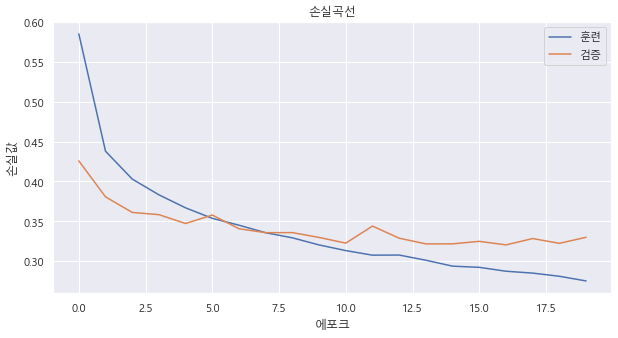

In [31]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('손실곡선')
plt.xlabel('에포크')
plt.ylabel('손실값')
plt.legend(['훈련', '검증'])
plt.show()
# 아까보단 나은 결과

#### 모델저장/ 로드

In [32]:
model.summary()

Model: "model_fn_MakeModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [33]:
# 훈련된 가중치만 저장
model.save_weights('./data/model-weights.h5')

In [34]:
# 훈련된 전체데이터 저장
model.save('./data/model.h5')
# 데이터 크기 3배 정도 차이남

##### 가중치 모델 로드

In [35]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('./data/model-weights.h5')

In [36]:
# model.evaluate(val_scaled, val_target)
# 가중치만 불렀기때문에 evaluate는 안된다

##### 전체모델 로드

In [37]:
model = keras.models.load_model('./data/model.h5')
model.evaluate(val_scaled, val_target)
# 데이터 사이즈가 커지긴하지만 모델 전체를 저장하는게 모든 기능을 다 쓸 수 있어서 좋다

375/375 [==============================] - 1s 1ms/step - loss: 0.3772 - accuracy: 0.8801


[0.3772301971912384, 0.8800833225250244]

가중치만 저장하면 모델 기능 제약있음. 모델 전체 데이터 저장하면 모든 기능 사용 수행가능

In [38]:
model.predict(val_scaled)

375/375 [==============================] - 1s 1ms/step


array([[1.5660898e-22, 0.0000000e+00, 1.4315675e-27, ..., 3.6063063e-23,
        1.0000000e+00, 3.1353519e-24],
       [4.5677975e-12, 5.9560640e-35, 3.0279053e-13, ..., 2.7421548e-21,
        1.0000000e+00, 2.6560911e-24],
       [5.0601386e-22, 4.2135984e-33, 6.6889345e-36, ..., 9.9992216e-01,
        5.2743069e-16, 1.3757791e-14],
       ...,
       [1.0667808e-08, 2.5810307e-30, 1.8433486e-11, ..., 2.4061213e-14,
        1.0000000e+00, 3.8865536e-19],
       [1.0756423e-15, 0.0000000e+00, 1.4181270e-18, ..., 5.6633414e-27,
        1.0000000e+00, 5.5789924e-25],
       [1.4176578e-04, 1.2627666e-12, 4.6166686e-05, ..., 2.2340394e-04,
        4.9180628e-08, 9.7655970e-01]], dtype=float32)

In [39]:
# 예측결과
val_labels = np.argmax(model.predict(val_scaled), axis=-1)
np.mean(val_labels == val_target)

375/375 [==============================] - 0s 1ms/step


0.8800833333333333

In [40]:
val_labels.shape

(12000,)

#### 콜백 Callback

In [41]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')
# 베스트 모델을 저장할 콜백
checkpoint_cb = keras.callbacks.ModelCheckpoint('./data/best_model.h5')
model.fit(train_scaled, train_target, epochs=20, verbose=1, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb])

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6034 - accuracy: 0.7876 - val_loss: 0.4354 - val_accuracy: 0.8479
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4408 - accuracy: 0.8418 - val_loss: 0.3890 - val_accuracy: 0.8537
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4072 - accuracy: 0.8517 - val_loss: 0.3634 - val_accuracy: 0.8682
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3833 - accuracy: 0.8611 - val_loss: 0.3578 - val_accuracy: 0.8696
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3714 - accuracy: 0.8627 - val_loss: 0.3520 - val_accuracy: 0.8690
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3602 - accuracy: 0.8677 - val_loss: 0.3363 - val_accuracy: 0.8767
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3489 - accuracy: 0.8719 - val_loss: 0.3477 - val_accuracy:

In [42]:
# 체크포인트 확인
model = keras.models.load_model('./data/best_model.h5')
model.evaluate(val_scaled, val_target)
# 젤 마지막 값 들어감

375/375 [==============================] - 1s 1ms/step - loss: 0.3214 - accuracy: 0.8832


[0.3214224874973297, 0.8832499980926514]

#### 조기종료

In [57]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')
# 베스트 모델을 저장할 콜백
# save_best_only=True 해줘야 가장 좋은 모델 저장됨
# 어떤게 저장됐는지 보고싶으면 verbose=1 로 확인
checkpoint_cb = keras.callbacks.ModelCheckpoint('./data/best_model_2.h5', save_best_only=True, verbose=1)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, verbose=1, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1480/1500 [============================>.] - ETA: 0s - loss: 0.5962 - accuracy: 0.7908
Epoch 1: val_loss improved from inf to 0.43902, saving model to ./data\best_model_2.h5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5949 - accuracy: 0.7912 - val_loss: 0.4390 - val_accuracy: 0.8413
Epoch 2/20
1473/1500 [============================>.] - ETA: 0s - loss: 0.4369 - accuracy: 0.8429
Epoch 2: val_loss improved from 0.43902 to 0.38215, saving model to ./data\best_model_2.h5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4369 - accuracy: 0.8429 - val_loss: 0.3822 - val_accuracy: 0.8625
Epoch 3/20
1494/1500 [============================>.] - ETA: 0s - loss: 0.4023 - accuracy: 0.8549
Epoch 3: val_loss did not improve from 0.38215
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4024 - accuracy: 0.8549 - val_loss: 0.3879 - val_accuracy: 0.8576
Epoch 4/20
1488/1500 [============================>.] - ETA: 0s - loss: 0.3806 - a

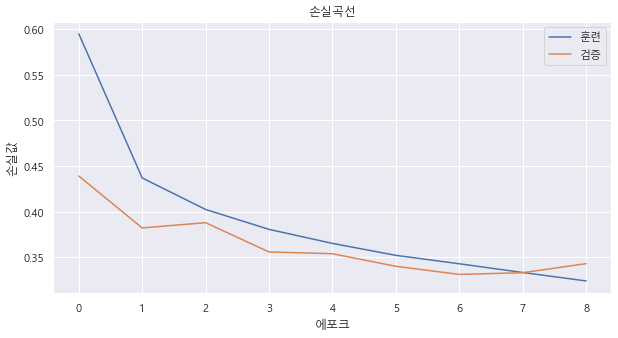

In [58]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('손실곡선')
plt.xlabel('에포크')
plt.ylabel('손실값')
plt.legend(['훈련', '검증'])
plt.show()

In [59]:
# 어느 에포크에서 조기종료했는지 확인
early_stopping_cb.stopped_epoch  # 8번째에서 멈춤(드랍아웃)

8

In [60]:
model.evaluate(val_scaled, val_target)  # 에포크7의 값이 나옴

375/375 [==============================] - 1s 1ms/step - loss: 0.3312 - accuracy: 0.8793


[0.33118218183517456, 0.8793333172798157]

In [54]:
# # 최종값 저장
# model.save('./data/best_model_epoch9.h5')
# # 확인해보기 위함(파일 지웠음)

In [53]:
# model = keras.models.load_model('./data/best_model.h5')  # earlystopping 콜백된 모델
# model.evaluate(val_scaled, val_target)
# # 10번째 값이 저장돼야 하는데 12번째(마지막)값이 나와서 조기종료부분 모델 새로 만듦

375/375 [==============================] - 1s 1ms/step - loss: 0.3356 - accuracy: 0.8768


[0.3355741798877716, 0.8768333196640015]

### 조기종료된 모델 저장값 / 체크포인트로 저장된 모델 저장값 비교

In [61]:
model_cp = keras.models.load_model('./data/best_model_2.h5')
model_cp.evaluate(val_scaled, val_target)
# 위의 에포크7의 값이랑 같게 나옴

375/375 [==============================] - 1s 1ms/step - loss: 0.3312 - accuracy: 0.8793


[0.33118218183517456, 0.8793333172798157]

In [56]:
# model_9 = keras.models.load_model('./data/best_model_epoch9.h5')
# model_9.evaluate(val_scaled, val_target)
# # 확인용

375/375 [==============================] - 1s 1ms/step - loss: 0.3356 - accuracy: 0.8768


[0.3355741798877716, 0.8768333196640015]

In [62]:
# 예측결과
val_labels = np.argmax(model.predict(val_scaled), axis=-1)
np.mean(val_labels == val_target)

375/375 [==============================] - 1s 2ms/step


0.8793333333333333

In [63]:
val_labels[:10]

array([8, 8, 7, 4, 8, 4, 1, 0, 4, 5], dtype=int64)